#**CASE 2 - Fisika Komputasi**

---
***Electrostatic Force System using Newton Interpolation and Outline Image using Cubic Spline***
---

**KELOMPOK 2 - Fisika B**
1.   Dhinar Hidayath 		       (1306621054)
2.   Khansa Farras Callista	A. (1306621067)
3.   Puspa Zuhrotul Kamilah	   (1306621058)
4.   Salma Mardhiyah     	     (1306621061)




---


**Artikel-1 *Interpolation Newton Electrostatic Force System***

================================ METODE NEWTON INTERPOLATION ================================ 

Perhitungan-1 Capacitance Gradient Measurement Results
---> Perhitungan Kapasitansi pada detik (s) ke-26.55

Perhitungan-2 AFM Cantilever Stiffness Measurement
---> Perhitungan Tegangan pada detik (s) ke-44


======================== Capacitance Gradient Measurement Results =========================== 

TABEL PERHITUNGAN DENGAN METODE NEWTON INTERPOLATION
---------------------------------------------------------------------------------------------
|       t        |     f(t)       |        ST-1       |       ST-2       |       ST-3       |
|-------------------------------------------------------------------------------------------|
|     23.105     |    16.33928    |   -0.0002470741   |  0.0002748344    |  -0.0000982334   |
|--------------------------------------------------------------------------------------------
|     23.874     |    16.33909    |   0.0001190053    |  0.0000788588    |
|

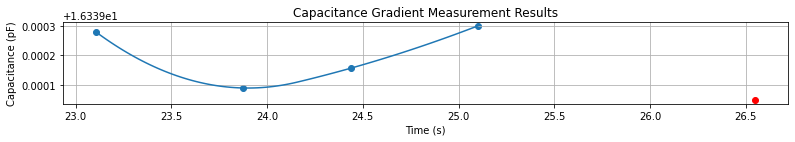


Kapasitansi pada 26.55 s adalah sekitar 16.339048954860218 pF



======================== AFM Cantilever Stiffness Measurement =========================== 

TABEL PERHITUNGAN DENGAN METODE NEWTON INTERPOLATION
---------------------------------------------------------------------------------------------
|       t        |     f(t)       |        ST-1       |       ST-2       |       ST-3       |
|-------------------------------------------------------------------------------------------|
|       39       |    649.6094    |   2.2437250000    |  -0.5319250000   |  -0.1331708333   |
|--------------------------------------------------------------------------------------------
|       40       |   651.853125   |   1.1798750000    |  -0.9314375000   |
|-------------------------------------------------------------------------
|       41       |    653.033     |   -0.6830000000   |
|------------------------------------------------------
|       42       |     652.35     | 
--------------------

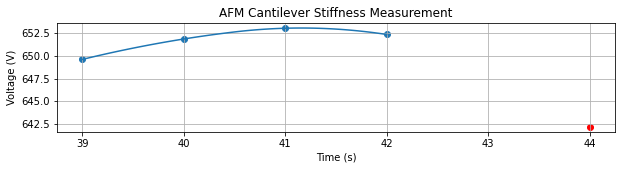


Tegangan pada 44.0 s adalah sekitar 642.1992749999994 V


In [8]:
# Membuat Grafik dari Data Awal dan Data Akhir
def grafik(x, y, detik, fnx, judulx, judul, size):
  xnew = np.linspace(x.min(), x.max(), 100) 
  spl = make_interp_spline(x, y, k=2) # type: BSpline
  ynew = spl(xnew)

  plt.figure(figsize=(size))
  plt.scatter(x, y)
  plt.scatter(detik, fnx, color='red')
  plt.plot(xnew, ynew)
  plt.xlabel('Time (s)')
  plt.ylabel(judulx)
  plt.title(judul)
  plt.grid()
  plt.show()
  return

# Membuat Fungsi Perhitungan Dengan Metode Newton Interpolation
def newton_interpolation(x, fy, t):
    for i in range(len(x)-1):
        list_fz = []
        n = i
        for j in range(len(fy[i])-1):
            fz = (fy[i][j+1]-fy[i][j])/ (x[n+1]-x[j])
            list_fz.append(fz)
            n += 1
        fy.append(list_fz)

    fnx = fy[len(fy)-1][0]
    for i in range(1, len(fy)):
        fnx = fy[len(fy)-1-i][0]+(t-x[len(fy)-1-i])*fnx
    return fnx

# Membuat Fungsi Mencetak Tabel Perhitungan
def tabel(x, y, fy, judul1):
    a, b = 0, 0
    print("\n\n"+"="*24, judul1,"="*27, "\n")
    print("TABEL PERHITUNGAN DENGAN METODE NEWTON INTERPOLATION")
    print("-"*93)
    print("{}{:^16}{}{:^15}".format("|","t","|","f(t)"),"|", end=" ")
    for i in range(1, len(y)):
        print("{:>10}{}{:^6}".format("ST-",i,""), "|", end="")
        if i == len(y)-1:
          print("")
          
    n = len(fy)
    print("|"+"-"*91+"|")
    for i in range(len(fy)):
        print("{}{:^16}{}{:^16}{}".format("|",x[i],"|",y[i],"|"),end=" ")
        for j in range(n-1):
            print("{:^17.10f}".format(fy[j+1][i]),"|", end="")
            if j == (n-2):
              print("")
              print("|"+"-"*(92+a-b))
              a += 1
              b += 20
        n -= 1
    print("")
    print("-"*35, "\n")
    return

# Meng-import modul yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# Judul dan Identitas Mahasiswa
print("="*32,"METODE NEWTON INTERPOLATION","="*32, "\n")

# Menginisiasikan Data Awal - Capacitance Gradient Measurement Results
C        = np.array([23.105, 23.874, 24.437, 25.1])
tc       = np.array([16.33928, 16.33909, 16.339157, 16.3393])
fxc      = []        
fxc.append(tc)
judulx_c = 'Capacitance (pF)'
judul_c  = 'Capacitance Gradient Measurement Results'
size_c   = 13, 1.5

# Menginisiasikan Data Awal - AFM Cantilever Stiffness Measurement
V        = np.array([39, 40, 41, 42])
tv       = np.array([649.6094, 651.853125, 653.033, 652.35])
fxv      = []        
fxv.append(tv)
judulx_v = 'Voltage (V)'
judul_v  = 'AFM Cantilever Stiffness Measurement'
size_v   = 10, 2

# Meminta pengguna untuk memasukkan waktu yang diinginkan
detik_c  = float(input("Perhitungan-1 "+judul_c+"\n---> Perhitungan Kapasitansi pada detik (s) ke-"))
detik_v  = float(input("\n"+"Perhitungan-2 "+judul_v+"\n---> Perhitungan Tegangan pada detik (s) ke-"))

# Memanggil Fungsi Perhitungan dan Fungsi Mencetak Tabel Perhitungan
fnx_c = newton_interpolation(C, fxc, detik_c)
tabel(C, tc, fxc, judul_c)
graph_c  = grafik(C, tc, detik_c, fnx_c, judulx_c, judul_c, size_c)
print(f"\nKapasitansi pada {detik_c} s adalah sekitar {fnx_c} pF\n")

fnx_v = newton_interpolation(V, fxv, detik_v)
tabel(V, tv, fxv, judul_v)
graph_v  = grafik(V, tv, detik_v, fnx_v, judulx_v, judul_v, size_v)
print(f"\nTegangan pada {detik_v} s adalah sekitar {fnx_v} V")



---


**Artikel-2 *Cubic Spline***


 Tabel Data Perhitungan Interpolasi Kubik Spline
----------------------------------------------------------------------------------------------------------------
|    j     |   x(j)   |   a(j)   |          b(j)           |          c(j)           |          d(j)           |
----------------------------------------------------------------------------------------------------------------
|    j     |    x     |    a     |            b            |            c            |            d            |
----------------------------------------------------------------------------------------------------------------
|    0     |   0.9    |   1.3    |   0.5396238492562306    |           0.0           |   -0.247649057851442    | 
----------------------------------------------------------------------------------------------------------------
|    1     |   1.3    |   1.5    |   0.4207523014875384    |  -0.29717886942173044   |   0.9469120930523155    | 
--------------------------------------------

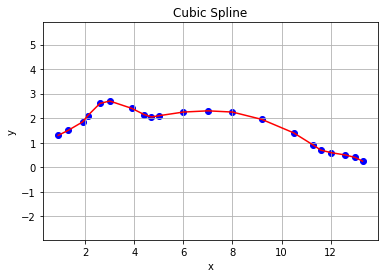

In [ ]:
from numpy import*
import numpy
import matplotlib.pylab as plt
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Menginisiasi Data Spline
x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]
n = len(x)-1

# Menghitung Interpolasi Cubic Spline dan Menampilkan dalam Tabel Data
print('\n','Tabel Data Perhitungan Interpolasi Kubik Spline')
print('-'*112)
print("|{:^10}|{:^10}|{:^10}|{:^25}|{:^25}|{:^25}|".format("j","x(j)", "a(j)", "b(j)", "c(j)", "d(j)"))
a = [y[i] for i in range (n+1)]
h = [x[i+1]-x[i] for i in range(n)]
alp = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
alp.insert(0,0)

l = [1] * (n+1)
miu = [0] * (n+1)
z = [0] * (n+1)
for i in range (1, n, 1):
    l[i]=(2*(x[i+1]-x[i-1]))-(h[i-1]*miu[i-1])
    miu[i]=h[i]/l[i]
    z[i]=(alp[i]-h[i-1]*z[i-1])/l[i]
b = [0] * (n+1)
c = [0] * (n+1)
d = [0] * (n+1)
for j in range(n-1, -1, -1):
    c[j]=z[j]-miu[j]*c[j+1]
    b[j]=(a[j+1]-a[j])/h[j]-(h[j]*(c[j+1]+2*c[j]))/3
    d[j]=(c[j+1]-c[j])/(3*h[j])
print("-"*112)
print("|{:^10}|{:^10}|{:^10}|{:^25}|{:^25}|{:^25}|".format("j","x", "a", "b", "c", "d"))
print('-'*112)
for j in range (0,n):
  print("{}{:^10}{}{:^10}{}{:^10}{}{:^25}{}{:^25}{}{:^25}{}".format("|",j, "|", x[j], "|", a[j], "|", b[j], "|", c[j], "|", d[j], "|"),end=" ")
  print("")
  print("-"*112)
print("{}{:^10}{}{:^10}{}{:^10}{}".format("|",n, "|", x[n], "|", a[n], "|"))
print('-'*34)

# Melakukan Input untuk Banyaknya Titik Dalam Selang
print("="*112)
m=int(input("\nMasukkan banyaknya titik dalam selang : "))
print()
print("="*112)
print('\nHasil interpolasi titik','\n')
print('-'*53)
print("|{:^25}|{:^25}|".format("x","S"))
print('-'*53)
bb=0
ba=0
xl=0
S=0
for j in range (0,n):
    bb=x[j]
    ba=x[j+1]
    for i in range (0, m+1):
        xl=bb+((i*(ba-bb))/m)
        S= a[j]+(b[j]*(xl-x[j]))+(c[j]*(xl-x[j]))+(d[j]*(xl-x[j]))
        print("|{:^25}|{:^25}|".format(xl,S))

# Menampilkan Grafik Plot Cubic Spline
print('-'*53)
print("\nCubic Spline (Berbentuk Bebek)\n")
plt.title('Cubic Spline')
plt.scatter(x, y,color="b")
plt.plot(x, y, color="r")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()
print()